In [1]:
import rastereasy

# Extraction of specific bands

2 possibilities:
1. return a new image with some selected bands (function `select_bands`)
2. select only some specific bands of an image (function `select_bands` with option `inplace=True`)

## 1) read image

In [2]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im)
help(image.select_bands)

Help on method select_bands in module rastereasy.rastereasy:

select_bands(bands=None, dest_name=None, inplace=False, reformat_names=False) method of rastereasy.rastereasy.Geoimage instance
    Select only specified bands in the image

    This method modifies the image to contain only the specified bands, discarding
    all other bands. Band naming can be preserved or updated based on parameters.

    Parameters
    ----------
    bands : str, list, int, or None, optional
        The bands to keep in the image. Format depends on band naming:
        - If using named bands: band name(s) as string(s) (e.g., 'NIR', ['R', 'G', 'B'])
        - If using indexed bands: band index/indices as int(s) or string(s) (e.g., 3, ['1', '4', '7'])
        If None, no bands are selected (invalid operation).

    dest_name : str, optional
        Path to save the modified image. If None, the image is not saved.
        Default is None.

    inplace : bool, default False
        If False, return a copy. O

## 2) Function `select_bands`

In [3]:
image_bands = image.select_bands(["8",10],reformat_names=False)
print("Before selection")
image.info()
print("After selection")
image_bands.info()


Before selection
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}


After selection
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 2
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'8': 1, '10': 2}




As can be seen, the names of bands is {'8': 1, '10': 2}

If now we extract two times a similar band, (ex [8,10,8]), names will be automatically reformatted

In [4]:
image_bands = image.select_bands(["8",10,8],reformat_names=False)
print("Before selection")
image.info()
print("After selection")
image_bands.info()


Before selection
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}


After selection
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3}




## 2) Function `select_bands` with `inplace=True`

Reading with names

Before selection
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}

--- History of modifications---
[2025-06-04 15:28:54] - Read image ./data/demo/sentinel.tif


After selection
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'SWI

<Figure size 640x480 with 0 Axes>

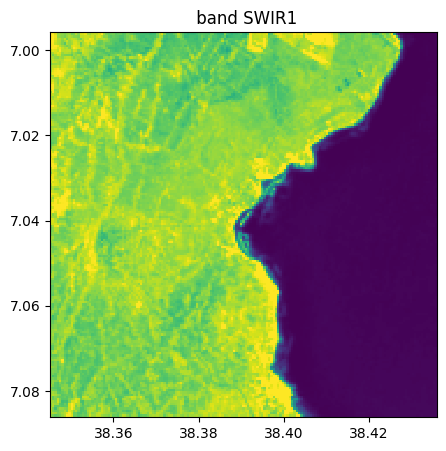

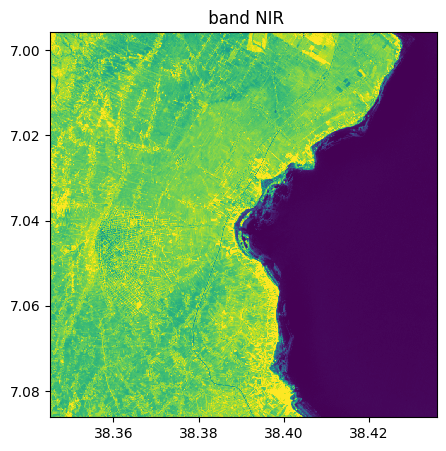

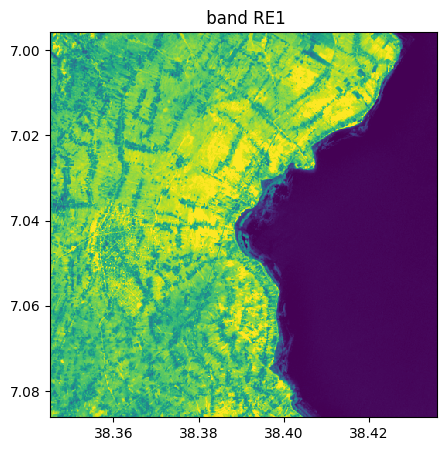

In [5]:
names = {"NIR":8,"G":3,"CO" : 1,"SWIR2":11,"B": 2,"R":4,"RE1":5,"RE2":6,"RE3":7,"WA":9,"SWIR1":10,"SWIR3":12}
image_names=rastereasy.Geoimage(name_im,names=names,history=True)
print("Reading with names\n")
print("Before selection")
image_names.info()
image_names.select_bands(["SWIR1","NIR","RE1"],reformat_names=False, inplace=True)
print("After selection")
image_names.info()
image_names.visu()
    

# Extract from image

## Entire image in numpy array

In [6]:
im=image.numpy_channel_first()
print(im.shape)


(12, 1000, 1000)


In [7]:
im=image.numpy_channel_last()
print(im.shape)


(1000, 1000, 12)


## Some channels in numpy array

a) without names 

In [8]:
bands=["1","4","3"]
im=image.numpy_channel_first(bands=bands)
print(im.shape)
bands=[1,4,3,8]
im=image.numpy_channel_last(bands=bands)
print(im.shape)


(3, 1000, 1000)
(1000, 1000, 4)


a) with names 

In [9]:
# re-read image_names since it has been modified
names = {"NIR":8,"G":3,"CO" : 1,"SWIR2":11,"B": 2,"R":4,"RE1":5,"RE2":6,"RE3":7,"WA":9,"SWIR1":10,"SWIR3":12}
image_names=rastereasy.Geoimage(name_im,names=names,history=True)


bands=["R","G","B"]
im=image_names.numpy_channel_first(bands=bands)
print(im.shape)
bands=["R","NIR","G","B"]
im=image_names.numpy_channel_last(bands=bands)
print(im.shape)


(3, 1000, 1000)
(1000, 1000, 4)


## Entire image in table of size (row*col, bands)

In [10]:
help(image.numpy_table)

Help on method numpy_table in module rastereasy.rastereasy:

numpy_table(bands=None) method of rastereasy.rastereasy.Geoimage instance
    Extract image data as a 2D table of shape (pixels, bands).

    This method reshapes the image into a 2D table where each row represents a pixel
    and each column represents a band. This format is useful for machine learning,
    statistical analysis, or any operation that treats pixels as independent samples.

    Parameters
    ----------
    bands : str, list of str, or None, optional
        The bands to include in the output:
        - If None: Returns all bands
        - If a string: Returns a single specified band
        - If a list: Returns the specified bands in the given order
        Default is None.

    Returns
    -------
    numpy.ndarray
        Image data as a 2D table with shape (rows*cols, bands)

    Examples
    --------
    >>> # Convert the entire image to a table
    >>> table = image.numpy_table()
    >>> print(f"Table sh

In [11]:
table=image.numpy_table()
print(table.shape)

(1000000, 12)


In [12]:
# recovering an image from this table
help(rastereasy.table2image)

Help on function table2image in module rastereasy.rastereasy:

table2image(table, size, channel_first=True)
    Reshape a 2D table back into a 3D image.

    Parameters
    ----------
    table : numpy.ndarray
        Input table with shape (rows*cols, bands) or (rows*cols,).
    size : tuple
        Size of the output image as (rows, cols).
    channel_first : bool, optional
        If True, output will have shape (bands, rows, cols).
        If False, output will have shape (rows, cols, bands).
        Default is True.

    Returns
    -------
    numpy.ndarray
        Reshaped 3D image.

    Examples
    --------
    >>> image = table2image(table, (400, 600), channel_first=True)



In [13]:
# Test with channel first recovery
image_recovered=rastereasy.table2image(table,image.shape)
print(image_recovered.shape)
# Test with channel last recovery
image_recovered=rastereasy.table2image(table,image.shape,channel_first=False)
print(image_recovered.shape)


(12, 1000, 1000)
(1000, 1000, 12)


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'B': 1, 'G': 2, 'R': 3}




<Figure size 640x480 with 0 Axes>

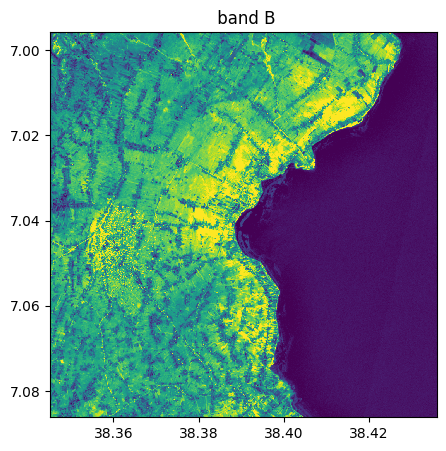

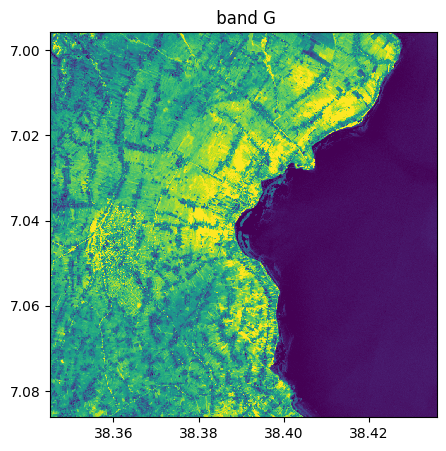

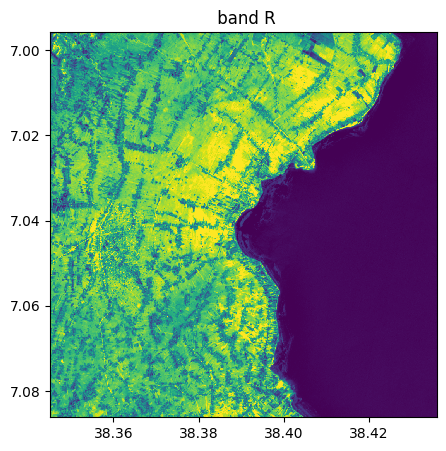

<Figure size 640x480 with 0 Axes>

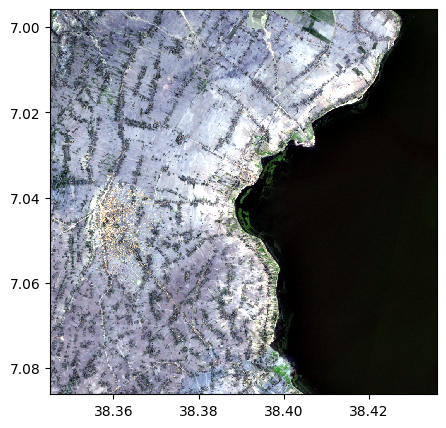

In [14]:
# We can directly create a geoimage from the table. Dimensions should match
# Example with the 8 first bands
image_recovered=image.image_from_table(table[:,1:4],names={"R":3,"G":2,"B":1},dest_name='./data/results/change_bands/image_from_table1.tif')
image_recovered.info()
image_recovered.visu()
image_recovered.colorcomp()


In [15]:
help(image.upload_table)
image_recovered.info()
image.info()
image.activate_history()
image.upload_table(table[:,2:5],names={"R":3,"G":2,"B":1},dest_name='./data/results/change_bands/image_from_table2.tif')
image.info()



Help on method upload_table in module rastereasy.rastereasy:

upload_table(table, names=None, dest_name=None) method of rastereasy.rastereasy.Geoimage instance
    Update the image data with a 2D table of shape (pixels, bands).

    This method replaces the current image data with the content of a 2D table where
    each row represents a pixel and each column represents a band. The table is
    reshaped to match the image dimensions.

    Parameters
    ----------
    table : numpy.ndarray
        The 2D table to upload, with shape (rows*cols, bands) or (rows*cols,) for a single band.
    names : dict, optional
        Dictionary mapping band names to band indices. If None, bands will be named
        sequentially ("1", "2", "3", ...).
        Default is None.
    dest_name : str, optional
        Path to save the updated image. If None, the image is not saved.
        Default is None.

    Returns
    -------
    self : Geoimage
        The updated image, allowing method chaining

   

## Some bands in table of size (row*col, bands)

In [16]:
bands=["R","NIR","G"]
table=image_names.numpy_table(bands)
print(table.shape)

(1000000, 3)


In [17]:
# Test with channel first recovery
image_recovered=rastereasy.table2image(table,image_names.shape)
print(image_recovered.shape)
# Test with channel last recovery
image_recovered=rastereasy.table2image(table,image.shape,channel_first=False)
print(image_recovered.shape)


(3, 1000, 1000)
(1000, 1000, 3)
